# Importing Dependencies
Here we import all the dependencies

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Loading the data
Loading the pickle file we stored while processing the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
name = "/content/drive/MyDrive/BTP/Datasets/Severson/batch1.pkl"
with open(name, "rb") as f:
  try:
    data = pickle.load(f)
  except Exception:
    raise Exception("Unable to load the dataset, please check for necessary permissions.")

In [6]:
print(len(data))

46


In [7]:
print(list(data.keys())[0:10])
print(list(data["b1c0"].keys()))
print(data["b1c0"]["charge_policy"])
print(data["b1c0"]["cycle_life"])
print(list(data["b1c0"]["summary"].keys()))
# Check whether data for all the cycles is present or not -> (last_cycle + 1 = cycle life)
print(len(data["b1c0"]["cycles"]) + 1 == data["b1c0"]["cycle_life"])
print(list(data["b1c0"]["cycles"]["0"].keys()))

['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c8', 'b1c9']
['cycle_life', 'charge_policy', 'summary', 'cycles']
3
1190.0
['IR', 'QCharge', 'QDischarge', 'Tavg', 'Tmax', 'Tmin', 'chargetime', 'cycle']
True
['I', 'Qc', 'Qd', 'Qdlin', 'T', 'Tdlin', 'V', 'discharge_dQdV', 't']


# Ananlysing Summary Level Data

In [8]:
keys_per_cell = list(data["b1c0"]["summary"].keys())
for key in keys_per_cell:
  print(key, type(data["b1c0"]["summary"][key]))

IR <class 'list'>
QCharge <class 'list'>
QDischarge <class 'list'>
Tavg <class 'list'>
Tmax <class 'list'>
Tmin <class 'list'>
chargetime <class 'list'>
cycle <class 'list'>


In [9]:
for key in keys_per_cell:
  print(key, data["b1c0"]["summary"][key][0:5])

IR [0.0, 0.016742354, 0.016724309, 0.016681245, 0.016661867]
QCharge [0.0, 1.0710422, 1.0716741, 1.0723044, 1.07297]
QDischarge [0.0, 1.0706892, 1.0719005, 1.0725095, 1.073174]
Tavg [0.0, 31.875010776448963, 31.931490327663376, 31.9326034757631, 31.95932155887516]
Tmax [0.0, 35.652016, 35.692978, 35.680588, 35.728691]
Tmin [0.0, 29.56613, 29.604385, 29.744202, 29.644709]
chargetime [0.0, 13.341250000000006, 13.42577666666666, 13.425166666666671, 13.34144166666665]
cycle [1.0, 2.0, 3.0, 4.0, 5.0]


The first cycle doesn't have much useful information so we can simply skip the first cycle while processing the data

Since all the cells in a bath were cycled in identical discharging conditions, we should analyse discharge capacity instead of charge capacity because they were cycled under varied fast-charging conditions.

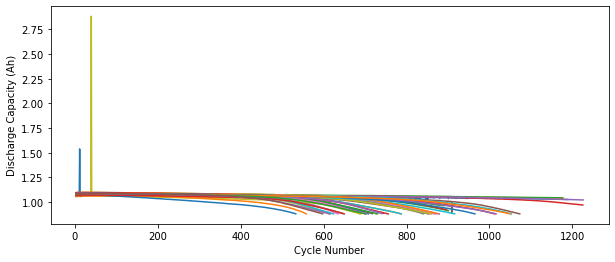

In [10]:
plt.figure(figsize=(10, 4))
plt.xlabel("Cycle Number")
plt.ylabel("Discharge Capacity (Ah)")
for i in data.keys():
  plt.plot(data[i]['summary']['cycle'][2:], data[i]['summary']['QDischarge'][2:])

In [11]:
num_processed = 0
for i in data.keys():
  for j, val in enumerate(data[i]["summary"]["QDischarge"]):
    if val > 1.10:
      num_processed += 1
      data[i]["summary"]["QDischarge"][j] = 1.10
    elif val < 0.88:
      num_processed += 1
      data[i]["summary"]["QDischarge"][j] = 0.88
print(num_processed)

48


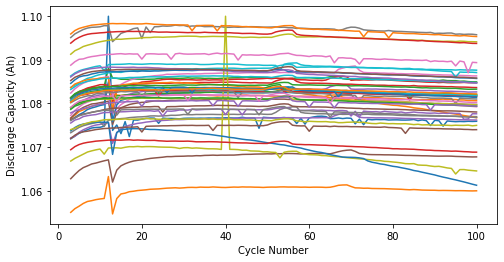

In [12]:
plt.figure(figsize=(8, 4))
plt.xlabel("Cycle Number")
plt.ylabel("Discharge Capacity (Ah)")
for i in data.keys():
  plt.plot(data[i]['summary']['cycle'][2:100], data[i]['summary']['QDischarge'][2:100])

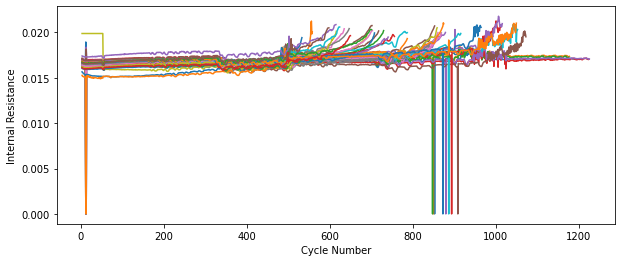

In [13]:
plt.figure(figsize=(10, 4))
plt.xlabel("Cycle Number")
plt.ylabel("Internal Resistance")
for i in data.keys():
  plt.plot(data[i]['summary']['cycle'][2:], data[i]['summary']['IR'][2:])

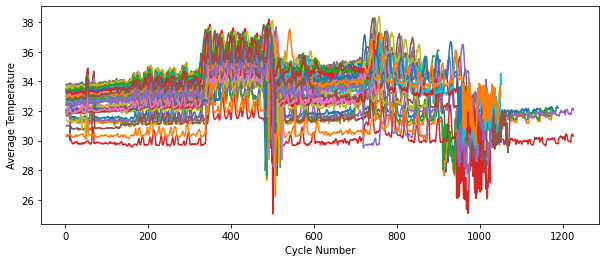

In [14]:
plt.figure(figsize=(10, 4))
plt.xlabel("Cycle Number")
plt.ylabel("Average Temperature")
for i in data.keys():
  plt.plot(data[i]['summary']['cycle'][2:], data[i]['summary']['Tavg'][2:])

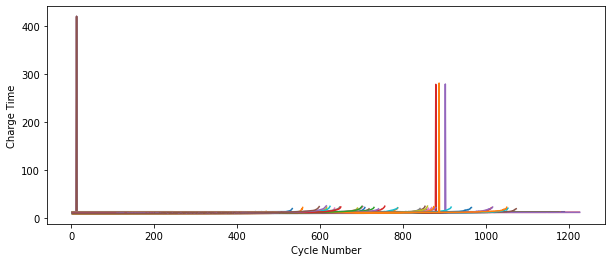

In [15]:
plt.figure(figsize=(10, 4))
plt.xlabel("Cycle Number")
plt.ylabel("Charge Time")
for i in data.keys():
  plt.plot(data[i]['summary']['cycle'][2:], data[i]['summary']['chargetime'][2:])

In [16]:
num_processed = 0
for i in data.keys():
  total = len(data[i]["summary"]["chargetime"])
  for j in range(1, total):
    if abs(data[i]["summary"]["chargetime"][j] - data[i]["summary"]["chargetime"][j - 1]) > 100:
      num_processed += 1
      data[i]["summary"]["chargetime"][j] = data[i]["summary"]["chargetime"][j - 1]
print(num_processed)

6


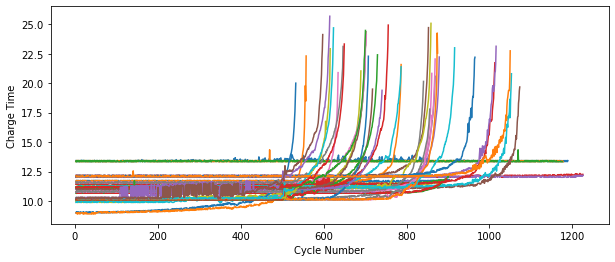

In [17]:
plt.figure(figsize=(10, 4))
plt.xlabel("Cycle Number")
plt.ylabel("Charge Time")
for i in data.keys():
  plt.plot(data[i]['summary']['cycle'][2:], data[i]['summary']['chargetime'][2:])

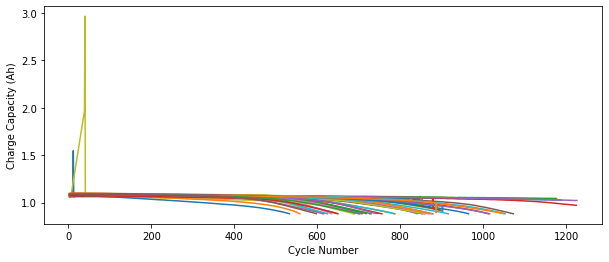

In [18]:
plt.figure(figsize=(10, 4))
plt.xlabel("Cycle Number")
plt.ylabel("Charge Capacity (Ah)")
for i in data.keys():
  plt.plot(data[i]['summary']['cycle'][2:], data[i]['summary']['QCharge'][2:])

In [19]:
num_processed = 0
for i in data.keys():
  for j, val in enumerate(data[i]["summary"]["QCharge"]):
    if val > 1.10:
      num_processed += 1
      data[i]["summary"]["QCharge"][j] = 1.10
print(num_processed)

35


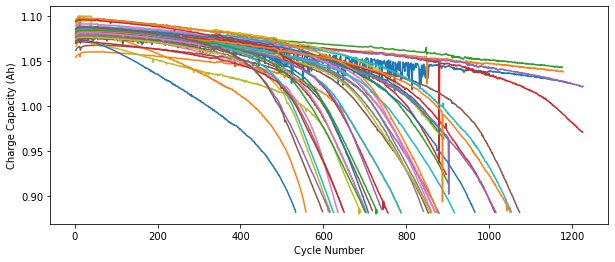

In [20]:
plt.figure(figsize=(10, 4))
plt.xlabel("Cycle Number")
plt.ylabel("Charge Capacity (Ah)")
for i in data.keys():
  plt.plot(data[i]['summary']['cycle'][2:], data[i]['summary']['QCharge'][2:])

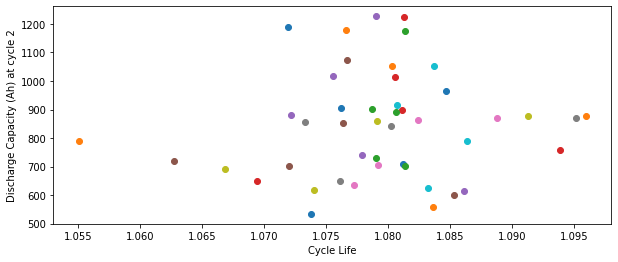

In [30]:
plt.figure(figsize=(10, 4))
plt.xlabel("Cycle Life")
plt.ylabel("Discharge Capacity (Ah) at cycle 2")
DC_cycle_2 = []
cycle_life = []
for i in data.keys():
  DC_cycle_2.append(data[i]['summary']['QDischarge'][2])
  cycle_life.append(data[i]['cycle_life'])
  plt.scatter(data[i]['summary']['QDischarge'][2], data[i]['cycle_life'])

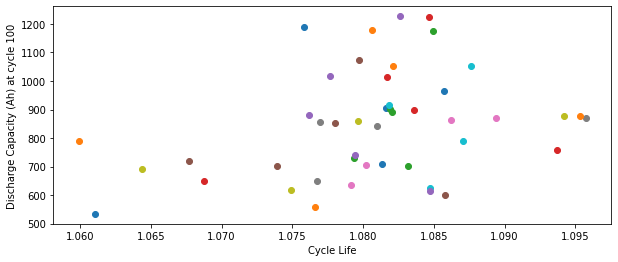

In [39]:
plt.figure(figsize=(10, 4))
plt.xlabel("Cycle Life")
plt.ylabel("Discharge Capacity (Ah) at cycle 100")
DC_cycle_100 = []
for i in data.keys():
  DC_cycle_100.append(data[i]['summary']['QDischarge'][100])
  plt.scatter(data[i]['summary']['QDischarge'][100], data[i]['cycle_life'])

In [35]:
import scipy.stats

In [37]:
scipy.stats.pearsonr(DC_cycle_2, cycle_life)

(0.07956992939962249, 0.5991298676782335)

In [40]:
scipy.stats.pearsonr(DC_cycle_100, cycle_life)

(0.29606089761255594, 0.045742925719465304)

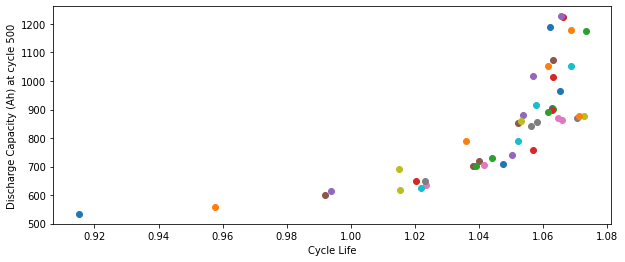

In [43]:
plt.figure(figsize=(10, 4))
plt.xlabel("Cycle Life")
plt.ylabel("Discharge Capacity (Ah) at cycle 500")
DC_cycle_500 = []
for i in data.keys():
  DC_cycle_500.append(data[i]['summary']['QDischarge'][500])
  plt.scatter(data[i]['summary']['QDischarge'][500], data[i]['cycle_life'])

In [44]:
scipy.stats.pearsonr(DC_cycle_500, cycle_life)

(0.7315892283568429, 7.673722066136556e-09)